## Plotting solutions to the rigid pendulum problem

In this assignment, we explore the solution to the undriven rigid pendulum using: the Euler code we wrote in class, and the `scipy.integrate` package.

In this assignemnt, please use $\omega_0 = 1$ and $I=1$, and $0\le t \le 100$.

----

**Additional information:**

We will use two different initial conditions:
* $\theta = \pi$ and $\frac{d\theta}{dt} = 0$, and
* $\theta = 0$ and $\frac{d\theta}{dt} = 2$.

**Temporal evolution of $\theta$:** for plots of $\theta$ versus $t$, include the following plotting options:
* `plt.figure(figsize=(10,2))`
* `plt.xlim([0, 100]) # time`
* `plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* Add axes labels and a legend

**Phase portraits:** for plots of $d\theta/dt$ versus $\theta$, include the following plotting options:
* `plt.figure(figsize=(12,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend

**Constant energy curves:** for contour plots of the energy, include the following plotting options:
* `plt.figure(figsize=(11,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend


## **Problem 1:**

Apply the Euler code we wrote in class to the rigid pendulum defined by $\ddot{\theta} + \omega_0^2 sin(\theta)=0$.

1. **[Text cell]:** Create a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to compare the simple Euler and symplectic/semi-implicit Euler methods and adjust mesh density to find sensible results. Explain your choice.

In [1]:
# problem 1

**Pseudocode**
1. Import modules
2. Define the function for respective parameters, then...
3. ... Define the parameters
4. Plot results


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
# Define our test euler method for a simple harmonic oscillator
def euler_sho(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps):
  """
  This function calculates the solution to theta'' = - omega_0 ^2 theta with Euler's method.
  """
  dt = (t_f - t_0) / n_steps # calculate dt
  theta = [theta_0] # initialized theta list
  ang_vel = [ang_vel_0] # initialized ang_vel list
  t = [t_0] # initialized t list
  for _ in range(n_steps):
    theta_new = theta[-1] + ang_vel[-1] * dt # update theta
    ang_vel_new = ang_vel[-1] - omega_0 ** 2 * theta_new * dt
    t_new = t[-1] + dt # update t
    theta.append(theta_new) # append theta
    ang_vel.append(ang_vel_new) # append ang_vel
    t.append(t_new) # append t
  return t, theta, ang_vel

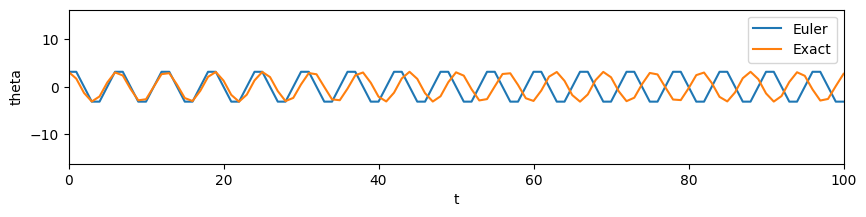

solution using Euler's method
         t      theta theta_exact theta_error
  0.000000   3.141593   3.141593   0.000000
  1.000000   3.141593   1.697410   1.444183
  2.000000   0.000000  -1.307364   1.307364
  3.000000  -3.141593  -3.110153  -0.031439
  4.000000  -3.141593  -2.053482  -1.088111
  5.000000   0.000000   0.891151  -0.891151
  6.000000   3.141593   3.016464   0.125129
  7.000000   3.141593   2.368454   0.773139
  8.000000   0.000000  -0.457102   0.457102
  9.000000  -3.141593  -2.862400  -0.279193
 10.000000  -3.141593  -2.636021  -0.505572
 11.000000   0.000000   0.013904  -0.013904
 12.000000   3.141593   2.651045   0.490547
 13.000000   3.141593   2.850828   0.290765
 14.000000   0.000000   0.429573  -0.429573
 15.000000  -3.141593  -2.386630  -0.754963
 16.000000  -3.141593  -3.008576  -0.133017
 17.000000   0.000000  -0.864451   0.864451
 18.000000   3.141593   2.074446   1.067147
 19.000000   3.141593   3.106107   0.035485
 20.000000   0.000000   1.282028  -1.282028


In [22]:
# Temporal evolution of theta for initial conditions set 1:

# Assign variables & call function
theta_0 = math.pi
ang_vel_0 = 0
omega_0 = 1
t_0 = 0
t_f = 100
n_steps = 100

t, theta, ang_vel = euler_sho(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# Get the exact values
theta_exact_sho = [theta_0 * math.cos(omega_0 * (t[i] - t_0)) + (ang_vel_0 / omega_0) * math.sin(omega_0 * (t[i] - t_0)) for i in range(len(t))]
theta_error = [theta[i] - theta_exact_sho[i] for i in range(len(theta))]

# Plot motion
plt.figure(figsize=(10,2))
plt.xlim([0, 100])
plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.plot(t, theta, label='Euler')
plt.plot(t, theta_exact_sho,label='Exact')
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()

print('solution using Euler\'s method')
print(f"{'t':>10s} {'theta':>10s} {'theta_exact':>10s} {'theta_error':>10s}")
for i in range(len(theta)):
  print(f"{t[i]:>10.6f} {theta[i]:>10.6f} {theta_exact_sho[i]:>10.6f} {theta_error[i]:>10.6f}")


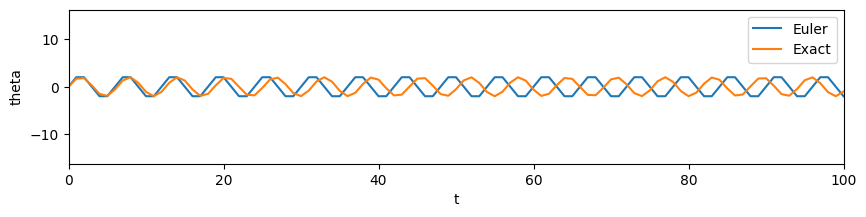

solution using Euler's method
         t      theta theta_exact theta_error
  0.000000   0.000000   0.000000   0.000000
  1.000000   2.000000   1.682942   0.317058
  2.000000   2.000000   1.818595   0.181405
  3.000000   0.000000   0.282240  -0.282240
  4.000000  -2.000000  -1.513605  -0.486395
  5.000000  -2.000000  -1.917849  -0.082151
  6.000000   0.000000  -0.558831   0.558831
  7.000000   2.000000   1.313973   0.686027
  8.000000   2.000000   1.978716   0.021284
  9.000000   0.000000   0.824237  -0.824237
 10.000000  -2.000000  -1.088042  -0.911958
 11.000000  -2.000000  -1.999980  -0.000020
 12.000000   0.000000  -1.073146   1.073146
 13.000000   2.000000   0.840334   1.159666
 14.000000   2.000000   1.981215   0.018785
 15.000000   0.000000   1.300576  -1.300576
 16.000000  -2.000000  -0.575807  -1.424193
 17.000000  -2.000000  -1.922795  -0.077205
 18.000000   0.000000  -1.501974   1.501974
 19.000000   2.000000   0.299754   1.700246
 20.000000   2.000000   1.825891   0.174109


In [23]:
# Temporal evolution of theta for initial conditions set 2:

# Assign variables & call function
theta_0 = 0
ang_vel_0 = 2
omega_0 = 1
t_0 = 0
t_f = 100
n_steps = 100

t, theta, ang_vel = euler_sho(omega_0, theta_0, ang_vel_0, t_0, t_f, n_steps)

# Get the exact values
theta_exact_sho = [theta_0 * math.cos(omega_0 * (t[i] - t_0)) + (ang_vel_0 / omega_0) * math.sin(omega_0 * (t[i] - t_0)) for i in range(len(t))]
theta_error = [theta[i] - theta_exact_sho[i] for i in range(len(theta))]

# Plot motion
plt.figure(figsize=(10,2))
plt.xlim([0, 100])
plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5])
plt.plot(t, theta, label='Euler')
plt.plot(t, theta_exact_sho,label='Exact')
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()

print('solution using Euler\'s method')
print(f"{'t':>10s} {'theta':>10s} {'theta_exact':>10s} {'theta_error':>10s}")
for i in range(len(theta)):
  print(f"{t[i]:>10.6f} {theta[i]:>10.6f} {theta_exact_sho[i]:>10.6f} {theta_error[i]:>10.6f}")

The $\theta$ value for the Euler approximation is only slightly different than the exactly calculated value, with the accuracy increasing as the desity of points increases, and the difference between the two generally increases as time progresses, with the exact values beginning to shift forward (to the right).

## **Problem 2:**

Use `scipy.integrate` and `solve_ivp` to solve the same problem. You'll need to settle on a solver and on tolerances to get physically meaningful results.

1. **[Text cell]:** Include a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to choose a solver and tolerances to see sensible results. Use `help(solve_ivp)` or `solve_ivp?` to explore these options. Explain your choice.



In [4]:
# problem 2

## **Problem 3:**

Debug and edit the code cell included below to plot the phase portrait on constant energy curves.

1. **[Code cell(s)]:** Debug the code cell below. Incorporate the details from the **_Constant energy curves_** item in the introduction. Add a comment at the end of each line explaining what that line does.
2. **[Code cell(s)]:** Combine the energy contours with your `theta_0 = 0`; `ang_vel_0=2` solution.
3. **[Text cell]:** Comment on the result.


In [5]:
import numpy as np
import matplotlib.piplot as plt

def rigid_pendulum_energy(theta, ang_vel, omega_0=1, moment_of_inertia=1):
  energy = 0.5 * moment_of_inertia * ang_vel ** 2 + moment_of_inerti * omega_0 ** 2 * (1-np.cos(theta))
return energy

theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)
ang_vel_list = np.linspace(- np.pi,  np.pi, 100)
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)
energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)
low_levels = np.linespace(0, 2, 5, endpoint=False)
high_levels = np.linspace(2, energy_mesh.max(), 15)
levels = np.concatenate((low_levels, high_levels))

x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]
y_lim = [- np.pi - 0.5, np.pi + 0.5]
x_ticks = np.pi * [-4, -2, 0, 2, 4]
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']
plt.figure(figsize={12, 3})
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh, levels=30, cmap='viridis')
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh, levels=levels, colors='white', linewidths=0.5)
# plt.plot(theta_plot[0], ang_vel_plot[1], label='rigid pendulum', color='red', linewidth=0.5)
plt.colorbar(contours., label='energy')
plt.xlabel('$\\theta$')
plt.ylabel('$d\\theta/dt$')
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(range(-3,4,1))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

SyntaxError: expected ':' (ipython-input-1704192596.py, line 4)